In [1]:
%reset

In [2]:
import pandas as pd
import numpy as np
import shapely as sh
from shapely.geometry import Polygon
import xmltodict
from pykml import parser
import xml.etree.ElementTree as ET

In [21]:
# ET.parse("SIP_CLUSTERS_004.kml").getroot()
ab=ET.tostring(ET.parse("SIP_CLUSTERS_004.kml").getroot(), encoding='utf-8', method='xml')
dict(xmltodict.parse(ab))

{'ns0:kml': OrderedDict([('@xmlns:ns0', 'http://www.opengis.net/kml/2.2'),
              ('ns0:Document',
               OrderedDict([('@id', 'root_doc'),
                            ('ns0:Schema',
                             OrderedDict([('@name', 'SIP_CLUSTERS_004'),
                                          ('@id', 'SIP_CLUSTERS_004'),
                                          ('ns0:SimpleField',
                                           [OrderedDict([('@name',
                                                          'Cluster_ID'),
                                                         ('@type', 'float')]),
                                            OrderedDict([('@name',
                                                          'Cluster_Na'),
                                                         ('@type', 'string')]),
                                            OrderedDict([('@name',
                                                          'Region_Nam'),
                 

In [23]:
# filename="SIP_CLUSTERS_004.kml"
parser.parse("SIP_CLUSTERS_004.kml").getroot()

<Element {http://www.opengis.net/kml/2.2}kml at 0x28d2762b9c0>

In [24]:
ET.parse("SIP_CLUSTERS_004.kml").getroot()

<Element '{http://www.opengis.net/kml/2.2}kml' at 0x0000028D278278B0>

In [ ]:
df_poly=pd.read_excel('poly.xlsx')
df_poly.head(10)

In [3]:
df_poly[['latitude','longitude']].values

array([[43.6135  , 40.048306],
       [43.696418, 40.326135],
       [43.569219, 39.755031],
       ...,
       [47.28031 , 39.717781],
       [47.248882, 39.758084],
       [47.261348, 39.71922 ]])

In [485]:
df_poly.columns

Index([' № Объекта / Site №', '№ БС / BS №', 'Код ГФК', 'Address', 'latitude',
       'longitude', 'Cluster_Name_1', 'Region_Name', 'City', 'Adress'],
      dtype='object')

In [4]:
5+5

10

In [486]:
df_poly['Cluster_Name_1'].unique()

array(['23_01', 'CL_23_02', 'CL_23_01', 'CL_61_01', 'CL_61_02',
       'CL_34_02', 'CL_34_01', '61_02', '61_01'], dtype=object)

In [487]:
df_poly[df_poly['Cluster_Name_1']=='CL_23_02'][['latitude','longitude']].values

array([[43.696418, 40.326135],
       [43.590651, 39.727538],
       [43.601698, 39.762808],
       [43.694486, 40.270746],
       [43.658862, 40.251942],
       [43.644131, 39.683287],
       [43.444052, 39.914703],
       [43.682202, 40.213242],
       [43.553222, 39.7905  ],
       [48.504722, 44.581667],
       [48.743423, 44.498831],
       [48.678056, 44.446389],
       [48.520145, 44.602456],
       [48.785555, 44.575611],
       [48.763056, 44.411944],
       [48.506389, 44.531667],
       [48.820556, 44.624722],
       [48.803333, 44.798056],
       [48.6775  , 44.437778],
       [48.6     , 44.426667],
       [48.7125  , 44.519722],
       [48.559167, 44.398611],
       [48.773413, 44.78339 ],
       [48.801111, 44.760278],
       [48.621209, 44.403436],
       [48.641389, 44.43    ],
       [48.706944, 44.505833],
       [48.503444, 44.608275],
       [48.7225  , 44.530833],
       [48.829167, 44.587222],
       [48.801944, 44.591111],
       [48.825556, 44.626944],
       [

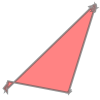

In [488]:
poly=Polygon(df_poly[df_poly['Cluster_Name_1']=='CL_23_02'][['latitude','longitude']].values)
poly

In [489]:
test_point=sh.geometry.Point(43.658862, 40.251942)


In [490]:
poly.intersects(sh.geometry.Point(df_poly[df_poly['Cluster_Name_1']=='CL_23_02'][['latitude','longitude']].values[0]))

True

In [491]:
df_poly[df_poly['Cluster_Name_1']=='CL_23_02'][['latitude','longitude']].values[0]

array([43.696418, 40.326135])

In [492]:
exits_stations_df=pd.read_excel('stations.xlsx')
exits_stations_df.head(5)

,NRI_SITE_ID,BTS_NUM,LONGITUDE,LATITUDE,CLUSTER
0,25001061303,61303,40.693944,45.345750,CL_23_31
1,25001061347,61347,40.182417,44.291000,SS
2,25001061360,61360,40.086312,44.596816,CL_01_2
3,25001063317,63317,40.290431,44.679021,SS
4,25001063360,63360,40.217806,44.391361,SS


In [493]:
exits_stations_df['CLUSTER'].unique()

array(['CL_23_31', 'SS', 'CL_01_2', 'CL_23_44', 'CL_01_1', 'CL_23_59',
       'CL_23_77', 'CL_23_50', 'CL_23_68', 'CL_23_61', 'CL_23_70',
       'CL_08_7', 'CL_08_2', 'CL_08_8', 'CL_08_10', 'CL_08_3', 'CL_08_9',
       'CL_08_6', 'CL_08_1'], dtype=object)

In [494]:
exits_stations_df[['LATITUDE','LONGITUDE']]

,LATITUDE,LONGITUDE
0,45.345750,40.693944
1,44.291000,40.182417
2,44.596816,40.086312
3,44.679021,40.290431
4,44.391361,40.217806
...,...,...
195,46.299360,44.198768
196,45.346667,46.018611
197,45.815463,44.657326
198,47.857995,45.432433


In [495]:
for m,n in enumerate(exits_stations_df[['LATITUDE','LONGITUDE']].values):
    print(m,n)

0 [45.34575  40.693944]
1 [44.291    40.182417]
2 [44.596816 40.086312]
3 [44.679021 40.290431]
4 [44.391361 40.217806]
5 [44.243639 40.172778]
6 [44.873531 40.058431]
7 [44.972    39.080556]
8 [44.609486 40.107207]
9 [44.597056 40.062556]
10 [44.591111 40.121301]
11 [44.622639 40.096944]
12 [44.632897 40.080581]
13 [44.844444 40.099167]
14 [44.674722 39.95125 ]
15 [44.886556 39.380306]
16 [44.872194 40.355806]
17 [44.929928 38.912589]
18 [44.917139 38.992861]
19 [45.135798 39.584228]
20 [44.584389 40.1105  ]
21 [44.625278 40.070556]
22 [44.623611 40.125833]
23 [44.980914 38.953622]
24 [44.8705   39.194722]
25 [44.609444 40.083056]
26 [44.51     40.177222]
27 [44.894025 40.485152]
28 [44.60875  40.143528]
29 [44.619611 40.11287 ]
30 [44.575556 40.133889]
31 [44.556528 40.089639]
32 [45.018694 40.209917]
33 [44.61825  40.055722]
34 [44.609972 40.094972]
35 [44.575222 40.18025 ]
36 [44.996    38.940222]
37 [44.787194 40.138028]
38 [45.012056 38.929111]
39 [44.894028 39.193111]
40 [45.050

In [496]:
for i in range(len(exits_stations_df)):
    print(poly.intersects(sh.geometry.Point(exits_stations_df[['LATITUDE','LONGITUDE']].values[i])))

True
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
True
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
True
False
True
True
True
False
False
False
False
False
True
False
False
False
False
True
False
False
False
True
False
True
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
False
False
False
False
True
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

In [497]:
len(exits_stations_df[['LATITUDE','LONGITUDE']].values)

200

In [498]:
df_poly['Cluster_Name_1']=df_poly['Cluster_Name_1'].apply(lambda x:x.replace('CL_',''))

In [499]:
df_poly['Cluster_Name_1'].unique()

array(['23_01', '23_02', '61_01', '61_02', '34_02', '34_01'], dtype=object)

In [500]:
test_table_df=exits_stations_df

In [501]:
test_table_df.head(10)

,NRI_SITE_ID,BTS_NUM,LONGITUDE,LATITUDE,CLUSTER
0,25001061303,61303,40.693944,45.345750,CL_23_31
1,25001061347,61347,40.182417,44.291000,SS
2,25001061360,61360,40.086312,44.596816,CL_01_2
3,25001063317,63317,40.290431,44.679021,SS
4,25001063360,63360,40.217806,44.391361,SS
5,25001063364,63364,40.172778,44.243639,SS
6,25001063365,63365,40.058431,44.873531,CL_23_44
7,25001063366,63366,39.080556,44.972000,SS
8,25001063373,63373,40.107207,44.609486,CL_01_2
9,25001063374,63374,40.062556,44.597056,CL_01_2


In [502]:
exits_stations_df['CLUSTER']=exits_stations_df['CLUSTER'].apply(lambda x:x.replace('CL_',''))

In [503]:
exits_stations_df['CLUSTER'].unique()

array(['23_31', 'SS', '01_2', '23_44', '01_1', '23_59', '23_77', '23_50',
       '23_68', '23_61', '23_70', '08_7', '08_2', '08_8', '08_10', '08_3',
       '08_9', '08_6', '08_1'], dtype=object)

In [504]:
exits_stations_df[exits_stations_df['CLUSTER']=='23_31']
# [['LATITUDE','LONGITUDE']]

,NRI_SITE_ID,BTS_NUM,LONGITUDE,LATITUDE,CLUSTER
0,25001061303,61303,40.693944,45.34575,23_31


In [505]:
ind_list=[]
for i in df_poly['Cluster_Name_1'].unique():
    del poly
    poly=Polygon(df_poly[df_poly['Cluster_Name_1']==i][['latitude','longitude']].values)
    for j in range(len(test_table_df)):
        if  poly.intersects(sh.geometry.Point(test_table_df[['LATITUDE','LONGITUDE']].values[j])):
            test_table_df['CLUSTER'][j]=i

C:\Users\karim\AppData\Local\Temp/ipykernel_15544/2409419959.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_table_df['CLUSTER'][j]=i


In [511]:
test_table_df['CLUSTER']

0      34_01
1      34_01
2      34_01
3      34_01
4      34_01
       ...  
195     08_1
196     08_8
197    34_02
198    08_10
199     08_7
Name: CLUSTER, Length: 200, dtype: object

In [510]:
df_poly['Cluster_Name_1'].unique()

array(['23_01', '23_02', '61_01', '61_02', '34_02', '34_01'], dtype=object)

In [248]:
for i in ind_list:
    test_table_df=test_table_df.drop(test_table_df.index[i]).reset_index(False,drop=True)

IndexError: index 147 is out of bounds for axis 0 with size 145

In [218]:
exits_stations_df[exits_stations_df.index!=exits_stations_df.index[0]]


,NRI_SITE_ID,BTS_NUM,LONGITUDE,LATITUDE,CLUSTER
1,25001061347,61347,40.182417,44.291000,SS
2,25001061360,61360,40.086312,44.596816,CL_01_2
3,25001063317,63317,40.290431,44.679021,SS
4,25001063360,63360,40.217806,44.391361,SS
5,25001063364,63364,40.172778,44.243639,SS
...,...,...,...,...,...
195,25008065970,65970,44.198768,46.299360,CL_08_1
196,25008065971,65971,46.018611,45.346667,CL_08_8
197,25008065972,65972,44.657326,45.815463,CL_08_9
198,25008065973,65973,45.432433,47.857995,CL_08_10
